In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('data_consumo_generacion_todo.csv', encoding= 'Latin-1').iloc[:,[0,1,7,8, 9]]

In [3]:
data

,Id_Pais,Año,Emisiones de gas HFC (miles de Tm de equivalente de CO2),Emisiones de gas PFC (miles de Tm de equivalente de CO2),Emisiones de gas SF6 (miles de Tm de equivalente de CO2)
0,1,1960,0.0,0.0,0.0
1,1,1961,0.0,0.0,0.0
2,1,1962,0.0,0.0,0.0
3,1,1963,0.0,0.0,0.0
4,1,1964,0.0,0.0,0.0
...,...,...,...,...,...
12023,198,2017,0.0,0.0,0.0
12024,198,2018,0.0,0.0,0.0
12025,198,2019,0.0,0.0,0.0
12026,198,2020,0.0,0.0,0.0


In [4]:
data2 = pd.read_csv('energyco2.csv')

In [5]:
data2

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547000,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547000,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547000,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547000,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
55435,55435,Zimbabwe,coal,2019,0.045064,0.075963,37.620400,1.465420e+04,11.508701,4.482962,4.586869
55436,55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.620400,1.465420e+04,11.508701,4.482962,0.000000
55437,55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.620400,1.465420e+04,11.508701,4.482962,4.377890
55438,55438,Zimbabwe,nuclear,2019,NaN,NaN,37.620400,1.465420e+04,11.508701,4.482962,0.000000


In [6]:
emisiones_co2 = data2[data2.Country == 'World'].iloc[:,[3,10]]

In [7]:
emisiones_co2

,Year,CO2_emission
0,1980,4946.627130
1,1980,1409.790188
2,1980,1081.593377
3,1980,2455.243565
4,1980,0.000000
...,...,...
54055,2019,15773.074341
54056,2019,7607.936618
54057,2019,12203.922539
54058,2019,0.000000


In [8]:
datos_modelo = emisiones_co2.groupby('Year').sum()

In [9]:
datos_modelo.reset_index(inplace=True)

In [10]:
datos_modelo = datos_modelo[datos_modelo.Year > 1980]

In [11]:
import matplotlib.pyplot as plt

In [12]:
x = datos_modelo['Year']
y = datos_modelo['CO2_emission']

In [13]:
def tema():
    ax=plt.axes()
    plt.grid(color='#ffffff50', linewidth=0.9)
    ax.set_facecolor('#00000020'),
    ax.spines['right'].set_visible(False),
    ax.spines['top'].set_visible(False),
    ax.spines['bottom'].set_visible(False),
    ax.spines['left'].set_visible(False),
    

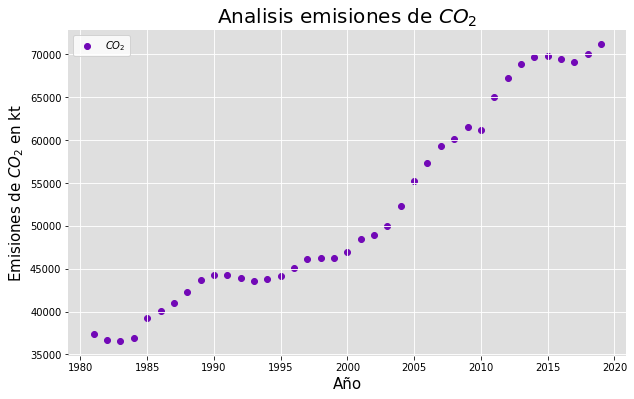

In [14]:
# sns.set()
# fig = plt.figure()
# ax = plt.axes()
tema()
plt.scatter(x,y,color='#7209b7')
plt.xlabel('Año',fontsize=15)
plt.ylabel('Emisiones de $CO_{2}$ en kt',fontsize=15)
plt.title('Analisis emisiones de $CO_{2}$',fontsize=20)
plt.gcf().set_size_inches(10, 6)
plt.legend(labels=['$CO_{2}$'])
plt.show()

In [15]:
def regresionLineal(df):
    '''
    df = DataFrame
    '''
    model = LinearRegression(fit_intercept=True)
    X = np.array(datos_modelo['Year'])
    y = np.array(datos_modelo['CO2_emission'])
    X = X[:, np.newaxis]
    model.fit(X, y)
    global X_train
    global X_test
    global y_train
    global y_test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)
    lr = LinearRegression(fit_intercept = True)
    lr.fit(X_train, y_train)
    
    return lr

In [16]:
modelo_co2 = regresionLineal(datos_modelo)

In [17]:
def grafica(modelo):
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)
    tema()
    plt.scatter(X_train, y_train,  color='green', linewidth=3.0, label = 'Datos Train')
    plt.plot(X_train, y_train_pred, color='k', linewidth=3.0, linestyle = '--', label = 'Prediccion Train')
    plt.scatter(X_test, y_test,  color='red', label = 'Datos Test')
    plt.plot(X_test, y_test_pred, color='blue', linewidth=3.0, label = 'Prediccion Test')
    plt.gcf().set_size_inches(10, 6)
    plt.legend()
    plt.show()

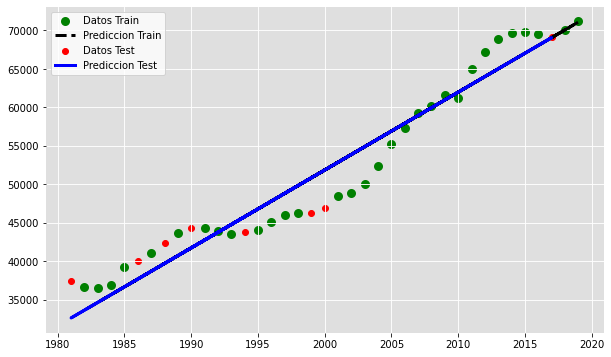

In [18]:
grafica(modelo_co2)

In [19]:
def prediccion(anio):
    '''
    fecha = 'AAAA'
    '''
    fn = anio # Fecha como número
    fn = np.array(fn)
    fn = fn.reshape(-1,1)
    prediccion = round(float(str(modelo_co2.predict(fn))[1:-1]),2)
    return prediccion

In [20]:
predicciones_10 = pd.DataFrame()
predicciones_10['Año'] = pd.DataFrame(range(2022,2033))


In [21]:
lista_años = list(predicciones_10['Año'])

In [22]:
predicciones_10['CO_2'] = predicciones_10['Año'].map(prediccion)

In [23]:
x_10 = predicciones_10['Año']
y_10 = predicciones_10['CO_2']

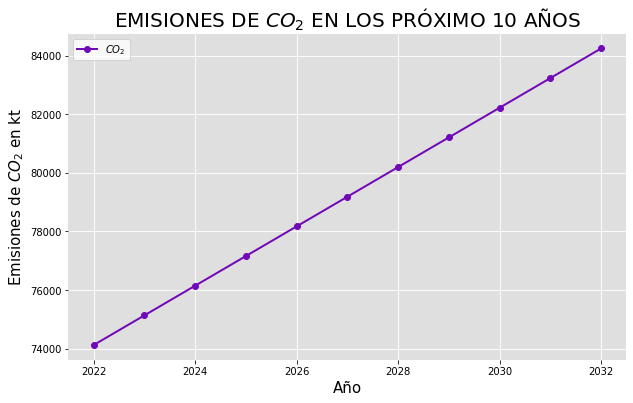

In [24]:
tema()

plt.plot(x_10,y_10,color='#7209b7', linewidth = 2, marker="o")
plt.xlabel('Año',fontsize=15)
plt.ylabel('Emisiones de $CO_{2}$ en kt',fontsize=15)
plt.title('EMISIONES DE $CO_{2}$ EN LOS PRÓXIMO 10 AÑOS',fontsize=20)
plt.gcf().set_size_inches(10, 6)
plt.legend(labels=['$CO_{2}$'])
plt.show()

In [25]:
predicciones_20 = pd.DataFrame()
predicciones_20['Año'] = pd.DataFrame(range(2022,2043))

In [26]:
lista_años = list(predicciones_20['Año'])

In [27]:
predicciones_20['CO_2'] = predicciones_20['Año'].map(prediccion)

In [28]:
x_20 = predicciones_20['Año']
y_20 = predicciones_20['CO_2']

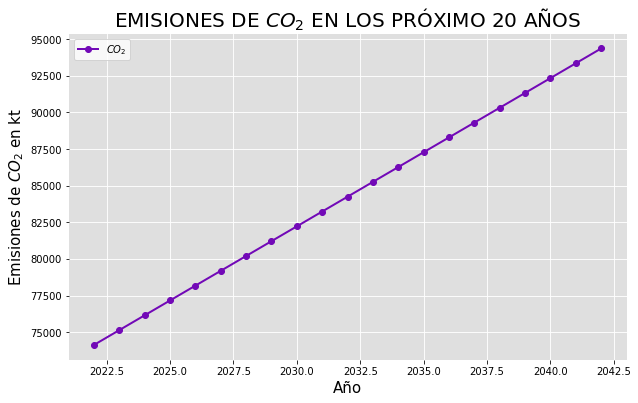

In [29]:
tema()

plt.plot(x_20,y_20,color='#7209b7', linewidth = 2, marker="o")
plt.xlabel('Año',fontsize=15)
plt.ylabel('Emisiones de $CO_{2}$ en kt',fontsize=15)
plt.title('EMISIONES DE $CO_{2}$ EN LOS PRÓXIMO 20 AÑOS',fontsize=20)
plt.gcf().set_size_inches(10, 6)
plt.legend(labels=['$CO_{2}$'])
plt.show()

In [30]:
predicciones_30 = pd.DataFrame()
predicciones_30['Año'] = pd.DataFrame(range(2022,2053))

In [31]:
lista_años = list(predicciones_30['Año'])

In [32]:
predicciones_30['CO_2'] = predicciones_30['Año'].map(prediccion)

In [33]:
x_30 = predicciones_30['Año']
y_30 = predicciones_30['CO_2']

In [34]:
y_30

0      74126.10
1      75137.93
2      76149.75
3      77161.58
4      78173.41
5      79185.24
6      80197.07
7      81208.90
8      82220.73
9      83232.55
10     84244.38
11     85256.21
12     86268.04
13     87279.87
14     88291.70
15     89303.53
16     90315.35
17     91327.18
18     92339.01
19     93350.84
20     94362.67
21     95374.50
22     96386.33
23     97398.16
24     98409.98
25     99421.81
26    100433.64
27    101445.47
28    102457.30
29    103469.13
30    104480.96
Name: CO_2, dtype: float64

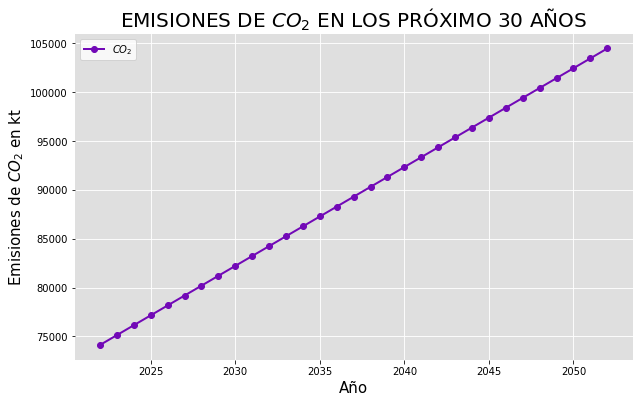

In [35]:
tema()

plt.plot(x_30,y_30,color='#7209b7', linewidth = 2, marker="o")
plt.xlabel('Año',fontsize=15)
plt.ylabel('Emisiones de $CO_{2}$ en kt',fontsize=15)
plt.title('EMISIONES DE $CO_{2}$ EN LOS PRÓXIMO 30 AÑOS',fontsize=20)
plt.gcf().set_size_inches(10, 6)
plt.legend(labels=['$CO_{2}$'])
plt.show()